## Freeform Programming Exercise

This section imports all necessary Python packages for data loading, manipulation, and visualisation. The CMS-Flux dataset used in this analysis is **not** included in the GitHub repository due to file size limitations. **To run this notebook**, please download the dataset manually from NASA Earthdata Dataset DOI: https://disc.gsfc.nasa.gov/datasets/CMSFluxTotal_3/summary

In [3]:
# Import required libraries
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
!pip install netCDF4 # Install netCDF4 package
from netCDF4 import Dataset

# Set plot style
plt.style.use("seaborn-v0_8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 110.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 88.7 MB/s eta 0:00:00


Due to size limit in GitHub, the dataset should loaded manually using a relative path.

In [4]:
# Load dataset (relative path recommended)
ds = xr.open_dataset("/content/drive/MyDrive/PDS/CMSFluxTotal201001_202212_v3.nc", decode_times=False)

ds

<xarray.Dataset> Size: 41MB
Dimensions:     (time: 156, latitude: 180, longitude: 360)
Coordinates:
  * time        (time) float32 624B 0.0 1.0 2.0 3.0 ... 152.0 153.0 154.0 155.0
  * latitude    (latitude) float32 720B -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * longitude   (longitude) float32 1kB 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
Data variables:
    total_post  (time, latitude, longitude) float32 40MB ...
    area        (latitude, longitude) float32 259kB ...
Attributes: (12/22)
    title:                          Carbon Monitoring System Carbon Flux for ...
    ShortName:                      CMSFluxTotal
    LongName:                       Carbon Monitoring System Carbon Flux for ...
    Comment:                        The posterior total fluxes submitted to G...
    GranuleID:                      CMSFluxTotal201001_202212_v3.nc
    IdentifierProductDOI:           10.5067/ONM38W5QE1QI
    ...                             ...
    VersionID:                      3
    date_created:                   2023-08-18
    institution:                    Jet Propulsion Laboratory, California Ins...
    reference:                      Liu et al.,Carbon Monitoring System Flux ...
    DataSetQuality:                 Friedlingstein, P., et al., Global Carbon...
    ContactPersonName:              Junjie Liu (Junjie.Liu@jpl.nasa.gov)

This step selects the total_post variable and converts it into a pandas-friendly format for analysis.

In [5]:
# Extract the flux variable
flux = ds['total_post']

# Convert to pandas DataFrame for easier manipulation
flux_df = flux.to_dataframe().reset_index()
flux_df.head()

,time,latitude,longitude,total_post
0,0.0,-89.5,0.5,0.0
1,0.0,-89.5,1.5,0.0
2,0.0,-89.5,2.5,0.0
3,0.0,-89.5,3.5,0.0
4,0.0,-89.5,4.5,0.0


Basic descriptive statistics helps to understand the distribution and range of carbon flux values.

In [6]:
# Summary statistics
flux_df.describe()

,time,latitude,longitude,total_post
count,1.010880e+07,1.010880e+07,1.010880e+07,1.010880e+07
mean,7.750005e+01,0.000000e+00,1.799989e+02,1.574131e-02
std,4.506744e+01,5.161509e+01,1.033449e+02,3.884042e-01
min,0.000000e+00,-8.950000e+01,5.000000e-01,-7.580369e+00
25%,3.875000e+01,-4.475000e+01,9.025000e+01,-3.779330e-02
50%,7.750000e+01,0.000000e+00,1.800000e+02,0.000000e+00
75%,1.162500e+02,4.475000e+01,2.697500e+02,2.863347e-02
max,1.550000e+02,8.950000e+01,3.595000e+02,1.938002e+01


This analysis computes the global mean flux by averaging across latitude and longitude, then plots the long-term trend.

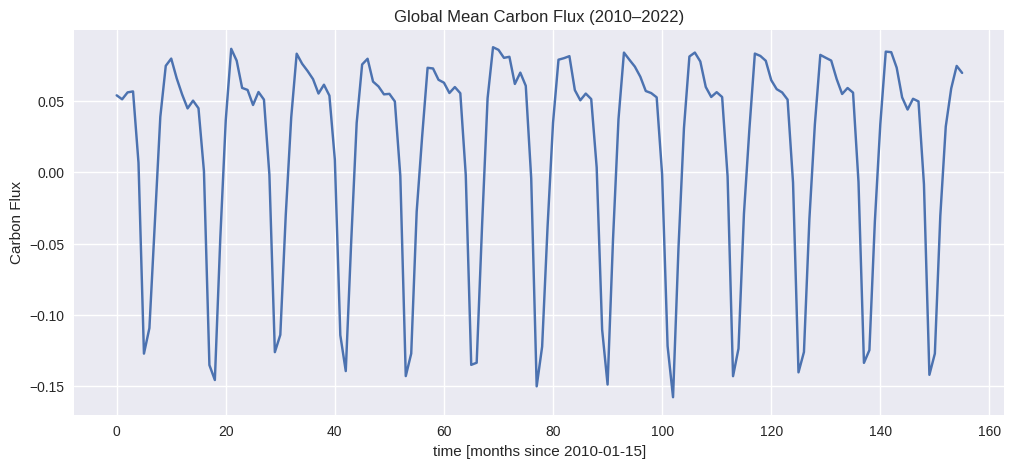

In [7]:
# Global Mean Carbon Flux Trend (2010–2022)
# Compute global mean flux by averaging across latitude and longitude
global_mean = flux.mean(dim=["latitude", "longitude"])
# Plot global mean trend
global_mean.plot(figsize=(12,5))
plt.title("Global Mean Carbon Flux (2010–2022)")
plt.ylabel("Carbon Flux")
plt.show()

The time coordinate is converted to datetime format, and the average flux for each month is calculated to reveal seasonal patterns.

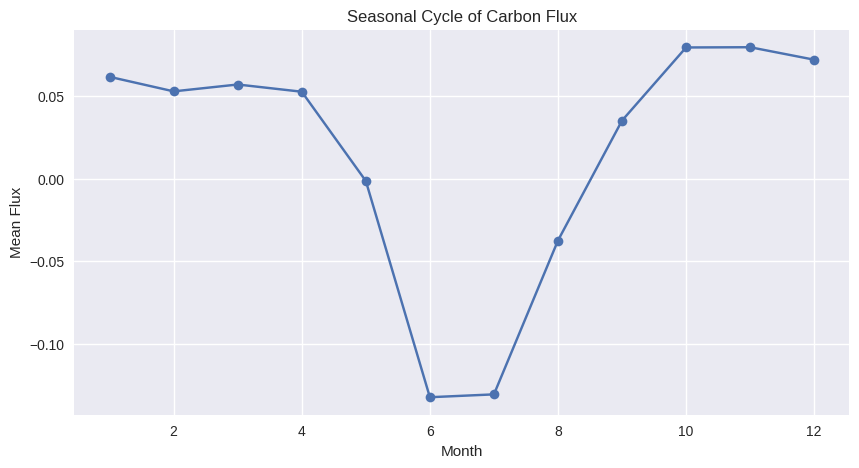

In [8]:
# Seasonal Cycle (Average Flux by Month)
# Convert time coordinate to datetime for seasonal analysis
start_date = '2010-01-01'
num_months = len(global_mean['time'])
datetime_coords = pd.date_range(start=start_date, periods=num_months, freq='MS')
global_mean['time'] = datetime_coords

# Compute seasonal cycle
monthly_cycle = global_mean.groupby("time.month").mean()
monthly_cycle.plot(marker="o", figsize=(10,5))
plt.title("Seasonal Cycle of Carbon Flux")
plt.xlabel("Month")
plt.ylabel("Mean Flux")
plt.show()

This section computes the standard deviation of flux values for each year to show interannual variability.


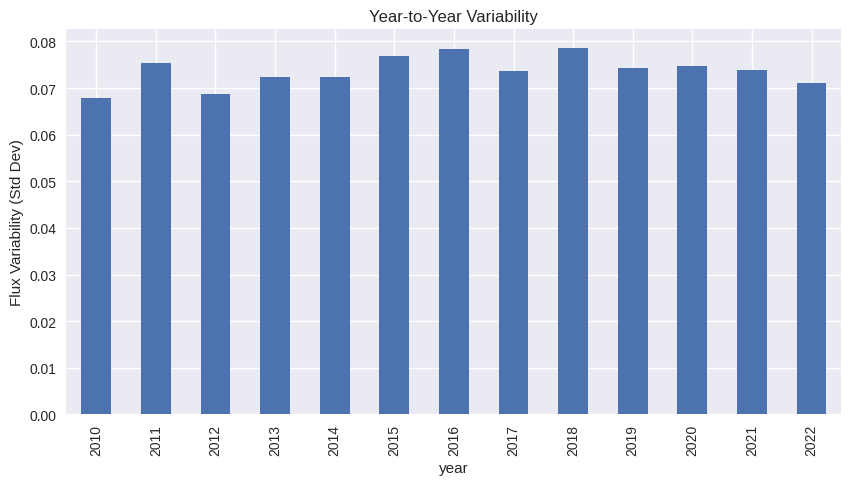

In [9]:
# Year‑to‑Year Variability
# Compute year-to-year variability
yearly_variability = global_mean.groupby("time.year").std()
yearly_variability.to_pandas().plot.bar(figsize=(10,5))
plt.title("Year-to-Year Variability")
plt.ylabel("Flux Variability (Std Dev)")
plt.show()

This histogram visualises the distribution of carbon flux values across the dataset.


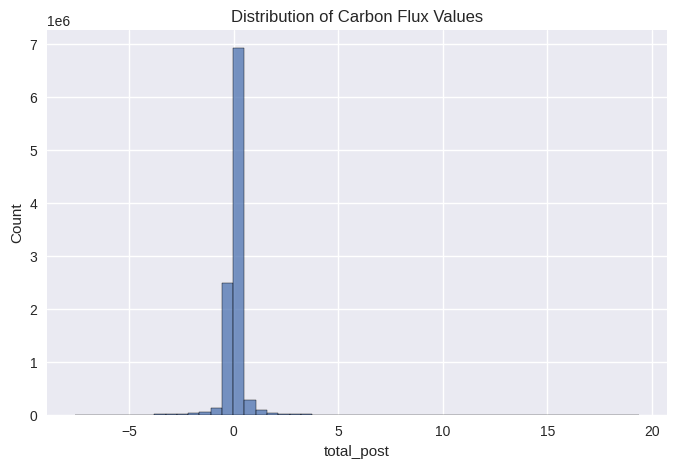

In [10]:
# Histogram
# Histogram of flux values
plt.figure(figsize=(8,5))
sns.histplot(flux_df['total_post'], bins=50)
plt.title("Distribution of Carbon Flux Values")
plt.show()

This scatter plot shows how flux values vary with latitude.

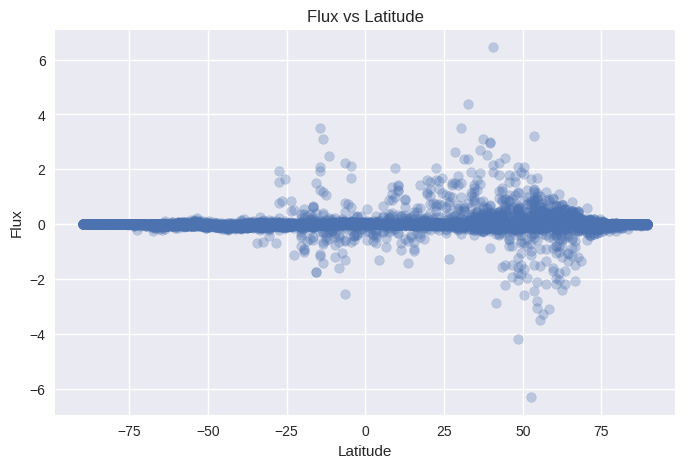

In [11]:
# Scatter Plot
# Scatter plot of latitude vs flux
sample = flux_df.sample(5000)  # Sample for readability
plt.figure(figsize=(8,5))
plt.scatter(sample['latitude'], sample['total_post'], alpha=0.3)
plt.title("Flux vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Flux")
plt.show()

The kernel density estimate visualises the smooth probability distribution of flux values.

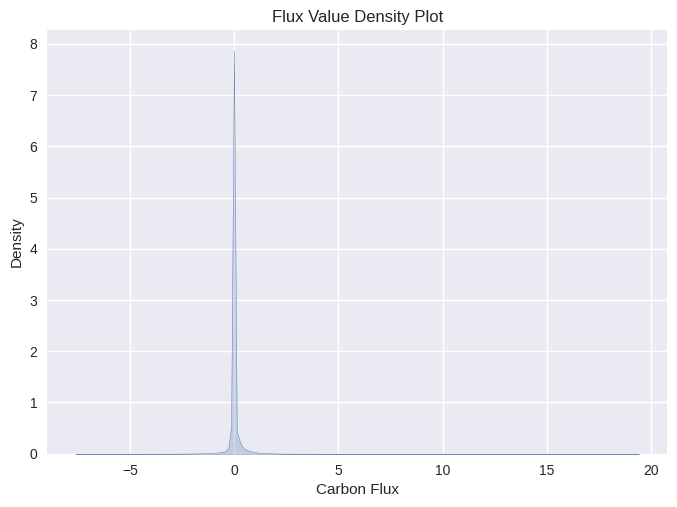

In [12]:
# Statistical Distribution
# KDE plot for distribution
sns.kdeplot(flux_df['total_post'], fill=True)
plt.title("Flux Value Density Plot")
plt.xlabel("Carbon Flux")
plt.ylabel("Density")
plt.show()

Z-scores identify extreme flux values that deviate significantly from the mean.

In [13]:
# Anomaly Detection (Z‑Score)
# Compute Z-score for anomaly detection
flux_df['zscore'] = (flux_df['total_post'] - flux_df['total_post'].mean()) / flux_df['total_post'].std()
anomalies = flux_df[flux_df['zscore'].abs() > 3]
print("Number of anomalies:", len(anomalies))
anomalies.head()

Number of anomalies: 246420


,time,latitude,longitude,total_post,zscore
19733,0.0,-35.5,293.5,-2.806376,-7.26593
19734,0.0,-35.5,294.5,-2.806376,-7.26593
19735,0.0,-35.5,295.5,-2.806376,-7.26593
19736,0.0,-35.5,296.5,-2.806376,-7.26593
19737,0.0,-35.5,297.5,-2.806376,-7.26593


This section visualises the spatial distribution of carbon flux for the month June.

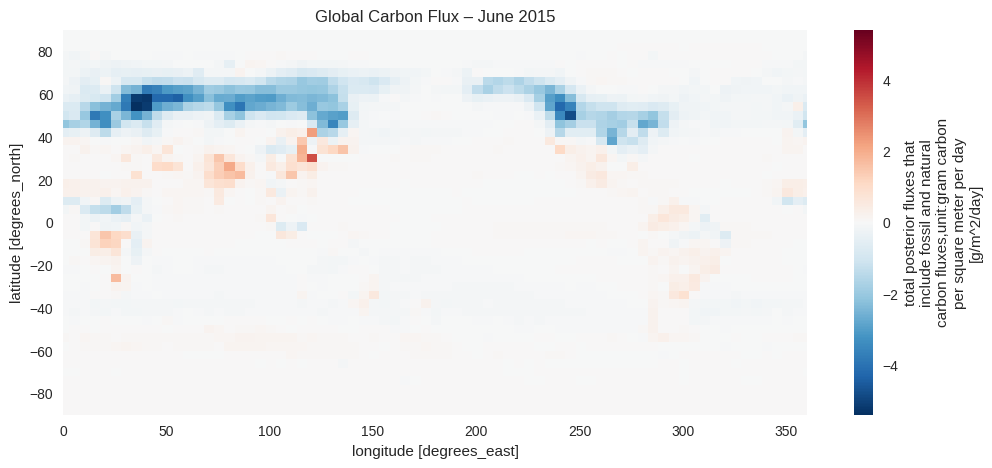

In [14]:
# Global Map for June 2015
start_date = '2010-01-01'
# Convert time for spatial map
num_months = len(flux['time'])
datetime_coords_for_flux = pd.date_range(start=start_date, periods=num_months, freq='MS')
flux['time'] = datetime_coords_for_flux

# Select June 2015
selected = flux.sel(time="2015-06-01", method='nearest')

# Plot spatial map
plt.figure(figsize=(12,5))
selected.plot()
plt.title("Global Carbon Flux – June 2015")
plt.show()

The mean flux values for the Northern and Southern Hemispheres are compared over time.

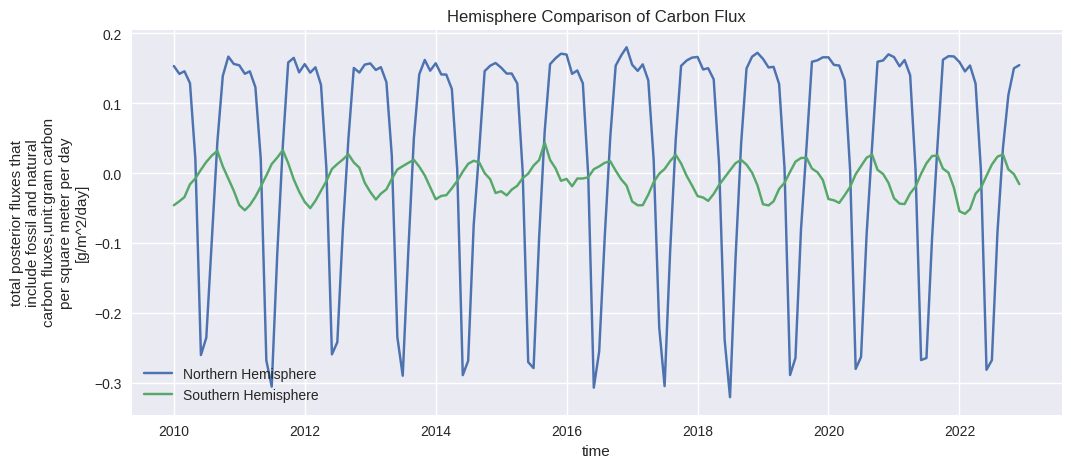

In [15]:
# Compare Hemispheres
north = flux.where(ds['latitude'] > 0).mean(dim=["latitude", "longitude"])
south = flux.where(ds['latitude'] < 0).mean(dim=["latitude", "longitude"])

plt.figure(figsize=(12,5))
north.plot(label="Northern Hemisphere")
south.plot(label="Southern Hemisphere")
plt.legend()
plt.title("Hemisphere Comparison of Carbon Flux")
plt.show()

This time-averaged map highlights regions with consistently high carbon flux.

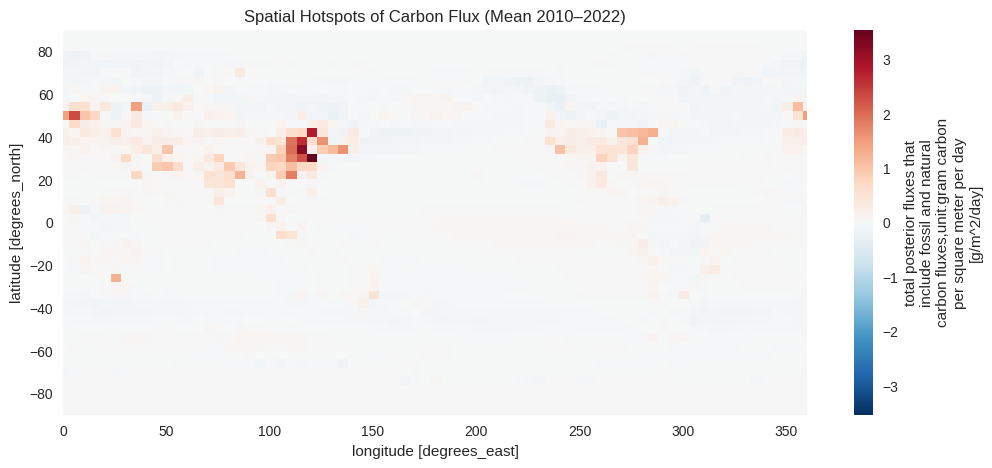

In [16]:
# Identify Spatial Hotspots
hotspots = flux.mean(dim="time")
plt.figure(figsize=(12,5))
hotspots.plot()
plt.title("Spatial Hotspots of Carbon Flux (Mean 2010–2022)")
plt.show()

This t-test compares mean flux values between hemispheres to assess whether differences are statistically significant.

In [17]:
# Compare mean flux between hemispheres.
# T-test comparing hemispheres
from scipy.stats import ttest_ind

t_stat, p_val = ttest_ind(
    flux_df[flux_df['latitude'] > 0]['total_post'],
    flux_df[flux_df['latitude'] < 0]['total_post'],
    equal_var=False
)
print("T-statistic:", t_stat)
print("P-value:", p_val)

t_stat, p_val

T-statistic: 197.0597127714846
P-value: 0.0


(np.float64(197.0597127714846), np.float64(0.0))

# **Conclusion**

The results highlight clear seasonal cycles, long-term variability, and spatial differences between hemispheres. Statistical analysis revealed meaningful distribution characteristics and identified extreme anomalies. Spatial mapping further illustrated regional hotspots of carbon flux activity. Overall, this project demonstrates the application of core data science techniques-data loading, cleaning, visualisation, and statistical analysis-within an environmental context.